In [33]:
import AutoOD as aod
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import importlib
importlib.reload(aod)

data_name = "mnist"
identifier = "npz"
init_points = 5
n_iter = 5

zipfile = np.load(f"./data_sampling/{data_name}.{identifier}", allow_pickle=True)
data, labels = zipfile["positions"], zipfile["labels"]

data, labels = data[::7], labels[::7]

print(len(data))

10000


In [35]:
autood = aod.AutoOutlierDetection(
	verbose=2, init_points=init_points, n_iter=n_iter,
	detection_algorithms=["maha", "isof", "lof", "abod"]
)
results = autood.fit(data)


Fitting the data using maha algorithm.
|   iter    |  target   | contam... |
-------------------------------------


KeyboardInterrupt: 

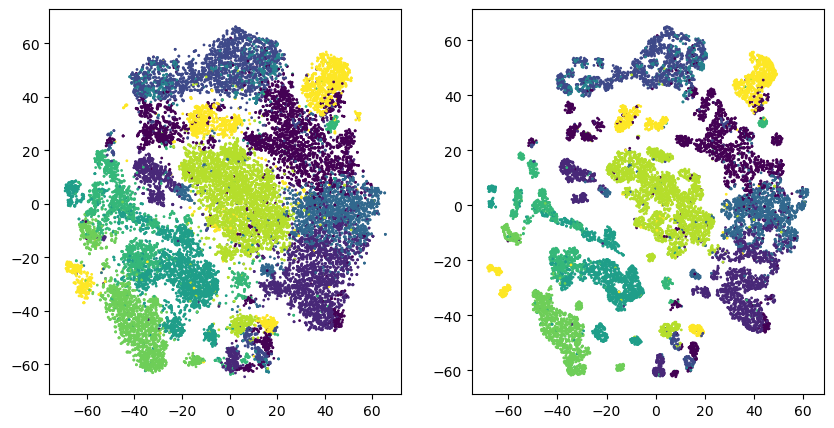

In [15]:
import json
results["prediction"] = np.array(results["prediction"])


data_wo_outliers = data[results["prediction"] == 1]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(data[:, 0], data[:, 1], s=1, c=labels)
axs[1].scatter(data_wo_outliers[:, 0], data_wo_outliers[:, 1], s=1, c=labels[results["prediction"] == 1])

plt.savefig(f"./autood_results/{data_name}_{init_points}_{n_iter}.png")
plt.savefig(f"./autood_results/{data_name}_{init_points}_{n_iter}.pdf")




In [8]:

results["prediction"] = results["prediction"].tolist()
with open(f"./autood_results/results/{data_name}_{init_points}_{n_iter}.json", "w") as f:
	json.dump(results, f)
